In [1]:
SIZE_FACE=48

In [2]:
import cv2
import pandas as pd
import numpy as np
from PIL import Image
import sklearn
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier


In [3]:
from sklearn.metrics import accuracy_score

In [4]:
FILE_PATH = 'fer2013.csv'
data = pd.read_csv(FILE_PATH)

In [5]:

from xgboost import XGBClassifier

C:\Users\Vaibhav Sharma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
EMOTIONS = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
def emotion_labeller(x):
    d = np.zeros(len(EMOTIONS))
    d[x] = 1.0
    return d

In [8]:
# returns pixel 48*48
def image_resizer(data):
    data_image = np.fromstring(str(data), dtype = np.uint8, sep = ' ').reshape((SIZE_FACE, SIZE_FACE))
    #data_image = Image.fromarray(data_image).convert('RGB')
    #data_image = np.array(data_image)[:, :, ::-1].copy()
    
    #data_image = format_image(data_image)
    return data_image

In [9]:
# return image ..
def image_formater(data):
    #print data
    data_image = np.fromstring(str(data), dtype = np.uint8, sep = ' ').reshape((SIZE_FACE, SIZE_FACE))
    data_image = Image.fromarray(data_image).convert('RGB')
    
    #data_image = format_image(data_image)
    return data_image

In [10]:
labels = []
images = []
pixels=[]
index = 1
total = data.shape[0]
for index,row in data.iterrows():
    emotion = emotion_labeller(row[0])
    pixel = image_resizer(row[1])
    image=image_formater(row[1])
    if image is not None:
        labels.append(emotion)
        images.append(image)
        pixels.append(pixel)

In [11]:
def print_images():
    fig=plt.figure(figsize=(6,6))
    for i in range(12):
        ax=fig.add_subplot(3,4,i+1,xticks=[],yticks=[])
        ax.imshow(x[i],cmap=plt.cm.bone,interpolation='nearest')

In [24]:
#print_images()

In [12]:
x=np.array(pixels)
x.shape

(35887, 48, 48)

In [13]:
target=data['emotion']

In [14]:
t=[]
for i in range(len(pixels)):
    t.append(x[i].reshape(48*48))


In [15]:
x=t[0:10000]
len(x[0])


2304

In [16]:
tar=target[0:10000]

In [17]:
df=pd.DataFrame(t)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [18]:
df.shape

(35887, 2304)

In [24]:
target[35877:]

35877    6
35878    3
35879    2
35880    2
35881    0
35882    6
35883    3
35884    0
35885    3
35886    2
Name: emotion, dtype: int64

In [25]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
35882,50,36,17,22,23,29,33,39,34,37,...,216,215,216,217,221,222,220,223,221,216
35883,178,174,172,173,181,188,191,194,196,199,...,147,141,136,118,66,7,0,0,0,0
35884,17,17,16,23,28,22,19,17,25,26,...,190,179,193,193,194,170,148,154,133,113
35885,30,28,28,29,31,30,42,68,79,81,...,30,27,27,26,28,35,35,35,30,28
35886,19,13,14,12,13,16,21,33,50,57,...,224,217,209,195,151,99,146,189,199,201


In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from time import time
import pickle

In [21]:
clf=PCA()
clf.fit(df)
v=clf.explained_variance_
v.shape

(2304,)

In [ ]:
sm=0
i=0
total=v.sum()
for i in range(v.shape[0]):
    sm+=v[i]
    if(sm/total>0.95):
        break
    i+=1
print('total : ',total)
print('sum   : ',sm)
print('best_features : ',i)

In [28]:
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.25,random_state=42)
print('x_train : ',x_train.shape)
print('y_train : ',y_train.shape)
print('x_test : ',x_test.shape)
print('y_test : ',y_test.shape)

x_train :  (26915, 2304)
y_train :  (26915,)
x_test :  (8972, 2304)
y_test :  (8972,)


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [34]:
cl_d=DecisionTreeClassifier()
cl_d.fit(x_train,y_train)
cl_d.score(x_test,y_test)

0.31598305840392332

In [32]:
n_component = 250
row_img=48
col_img=48
print("Extracting the top %d eigenfaces from %d faces"
      % (n_component, x_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_component, svd_solver='randomized',
          whiten=True).fit(x_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_component, row_img, col_img))
print('array :',eigenfaces.shape)
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 250 eigenfaces from 26915 faces
done in 38.828s
array : (250, 48, 48)
Projecting the input data on the eigenfaces orthonormal basis
done in 4.852s


In [54]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 3279.746s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [56]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(x_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=EMOTIONS))
print(confusion_matrix(y_test, y_pred, labels=range(7)))

Predicting people's names on the test set
done in 6.492s
             precision    recall  f1-score   support

      angry       0.33      0.26      0.29       392
  disgusted       0.80      0.12      0.21        34
    fearful       0.26      0.25      0.25       372
      happy       0.47      0.68      0.55       608
        sad       0.29      0.28      0.28       410
  surprised       0.57      0.38      0.46       263
    neutral       0.37      0.33      0.35       421

avg / total       0.38      0.39      0.37      2500

[[100   1  55 105  60  14  57]
 [  4   4   9   7   6   0   4]
 [ 54   0  92  90  76  28  32]
 [ 41   0  46 414  51  13  43]
 [ 52   0  53 103 115  12  75]
 [ 13   0  49  56  23 100  22]
 [ 43   0  52 111  68   9 138]]


In [55]:
clf.score(x_test_pca,y_test)

0.38519999999999999

In [58]:
import pickle
save_svc_grid_search=open("svc_grid_search.pickle","wb")
pickle.dump(clf,save_svc_grid_search)
save_svc_grid_search.close()

In [59]:
new=open("svc_grid_search.pickle","rb")
picclf=pickle.load(new)
new.close()

In [63]:
from sklearn.linear_model import LogisticRegression
clf_lr=LogisticRegression()


In [64]:
print("Fitting the classifier to the training set")
t0 = time()
clf_lr.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))


Fitting the classifier to the training set
done in 1684.437s


In [65]:
clf_lr.score(x_test,y_test)

0.25679999999999997

In [90]:
import pickle
save_svc_grid_search=open("logistic_regression.pickle","wb")
pickle.dump(clf_lr,save_svc_grid_search)
save_svc_grid_search.close()

In [67]:
from sklearn import ensemble


In [68]:
rfc=ensemble.RandomForestClassifier()

In [69]:
print("Fitting the classifier to the training set")
t0 = time()
rfc.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))


Fitting the classifier to the training set
done in 3.113s


In [70]:
rfc.score(x_test,y_test)

0.30599999999999999

In [80]:
print("Fitting the classifier to the training set")
t0 = time()
rfc.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))


Fitting the classifier to the training set
done in 1.327s


In [83]:
rfc.score(x_test_pca,y_test)

0.25280000000000002

In [84]:
cdf=pd.DataFrame(t)
cdf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [27]:
x_train,x_test,y_train,y_test=train_test_split(df,target,test_size=0.25,random_state=42)

In [87]:
print("Fitting the classifier to the training set")
t0 = time()
rfc.fit(x_train, y_train)
print("done in %0.3fs" % (time() - t0))


Fitting the classifier to the training set
done in 12.655s


In [88]:
rfc.score(x_test,y_test)

0.37293802942487742

In [91]:
import pickle
save_svc_grid_search=open("randomforest.pickle","wb")
pickle.dump(rfc,save_svc_grid_search)
save_svc_grid_search.close()

In [20]:
n_component = 300
row_img=48
col_img=48
print("Extracting the top %d eigenfaces from %d faces"
      % (n_component, x_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_component, svd_solver='randomized',
          whiten=True).fit(x_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_component, row_img, col_img))
print('array :',eigenfaces.shape)
print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
print("done in %0.3fs" % (time() - t0))

NameError: name 'x_train' is not defined

In [123]:
x_train_pca.shape

(26915, 300)

In [124]:
x_test_pca.shape

(8972, 300)

In [125]:
print("Fitting the classifier to the training set")
t0 = time()
rfc.fit(x_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))


Fitting the classifier to the training set
done in 7.228s


In [121]:
rfc.score(x_test_pca,y_test) #275

0.30584039233169863

In [126]:
rfc.score(x_test_pca,y_test)#300 comp..

0.31341952741863577

In [127]:
import pickle
save_svc_grid_search=open("randomforest_pca.pickle","wb")
pickle.dump(rfc,save_svc_grid_search)
save_svc_grid_search.close()

In [111]:
rfc.score(x_test_pca,y_test)# 800 comp..

0.29692376281765492

In [106]:
rfc.score(x_test_pca,y_test) #350 compo..

0.30383415069103881

In [101]:
rfc.score(x_test_pca,y_test) # 1500 components pr ..

0.27931341952741862

In [96]:
rfc.score(x_test_pca,y_test)# 500

0.29971020954079358

In [ ]:
#grid search whole data ..



print("Fitting the classifier to the training set")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(x_train, y_train)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

print(clf.score(x_test,y_test))
print("done in %0.3fs" % (time() - t0))

Fitting the classifier to the training set


In [128]:
x_train.shape

(26915, 2304)

In [129]:
x_test.shape

(8972, 2304)

In [34]:
xlf=XGBClassifier()
xlf.fit(x_train_pca,y_train)
xlf_pred=xlf.predict(x_test_pca)
xlf.score(x_test_pca,y_test)

0.36792242532322783

In [38]:
xlf = AdaBoostClassifier()
xlf.fit(x_train_pca,y_train)
xlf_pred=xlf.predict(x_test_pca)
xlf.score(x_test_pca,y_test)

0.31631743201069995

In [41]:
xlf = GradientBoostingClassifier()
xlf.fit(x_train_pca,y_train)
xlf_pred=xlf.predict(x_test_pca)
xlf.score(x_test_pca,y_test)

0.37973695942933572

In [24]:
xlf=XGBClassifier()
xlf.fit(x_train,y_train)
xlf_pred=xlf.predict(x_test)
xlf.score(x_test,y_test)

0.4014712438698172

In [27]:
import pickle
save_svc_grid_search=open("main_clf.pickle","wb")
pickle.dump(xlf,save_svc_grid_search)
save_svc_grid_search.close()

In [25]:
print(accuracy_score(y_test , xlf_pred))

0.40147124387


In [48]:
from sklearn import preprocessing as pp
x_trainz = pp.scale(x_train)
x_testz = pp.scale(x_test)

In [49]:
xlf=XGBClassifier()
xlf.fit(x_trainz,y_train)
xlf_pred=xlf.predict(x_testz)
xlf.score(x_testz,y_test)

0.3995764600980829

In [39]:
new=open("main_clf.pickle","rb")
xlf=pickle.load(new)
new.close()

In [41]:
y_pred=xlf.predict(x_test)

In [42]:
print(classification_report(y_test, y_pred, target_names=EMOTIONS))
print(confusion_matrix(y_test, y_pred, labels=range(7)))

             precision    recall  f1-score   support

      angry       0.39      0.13      0.19      1235
  disgusted       1.00      0.02      0.05       130
    fearful       0.36      0.15      0.21      1304
      happy       0.42      0.75      0.54      2248
        sad       0.31      0.33      0.32      1499
  surprised       0.55      0.48      0.51       990
    neutral       0.37      0.38      0.38      1566

avg / total       0.40      0.40      0.37      8972

[[ 159    0   71  487  228   67  223]
 [   9    3   12   54   19    9   24]
 [  68    0  191  467  242  131  205]
 [  57    0   55 1693  214   71  158]
 [  62    0   79  530  488   48  292]
 [  20    0   62  248   79  472  109]
 [  37    0   59  537  282   55  596]]


In [35]:
target[0:10]

0    0
1    0
2    2
3    4
4    6
5    2
6    4
7    3
8    3
9    2
Name: emotion, dtype: int64

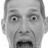

In [50]:
images[9]

In [48]:
EMOTIONS

['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']

In [46]:
EMOTIONS[6]

'neutral'

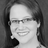

In [52]:
images[7]

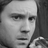

In [51]:
images[0]

In [56]:
EMOTIONS[0]

'angry'

In [56]:
x_test.iloc[0:1,:]

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
19098,142,148,152,158,163,163,166,167,167,167,...,183,181,176,170,176,161,41,17,19,24


In [14]:
xx=[]
for i in range(2304):
    xx.append(i)

In [63]:
df.columns=xx


In [18]:
xx=np.array(xx)
af=pd.DataFrame(xx.reshape(1,-1))
af.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303


In [26]:
c=xlf.predict(af)

In [66]:
xlf.predict(x_test)

array([4, 3, 6, ..., 4, 0, 3], dtype=int64)

In [67]:
xlf.predict(x_test.iloc[0:1,:])

array([4], dtype=int64)

In [70]:
xlf.predict[x_test[0]]

TypeError: 'method' object is not subscriptable

Fitting the classifier to the training set


In [28]:
EMOTIONS = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
e=EMOTIONS[0]

In [29]:
e

'angry'

In [30]:
str(e)

'angry'

In [31]:
from PIL import Image


In [ ]:
img=Image.open()